In [2]:
import numpy as np

def generate_log_range(start, end, num_points):
    """
    Generate a logarithmic range between start and end with a specified number of points.

    Parameters:
    - start: The start value of the range.
    - end: The end value of the range.
    - num_points: The number of points in the range.

    Returns:
    - log_range: A numpy array representing the logarithmic range.
    """
    log_range = np.logspace(np.log10(start), np.log10(end), num=num_points)
    return log_range




In [3]:
import numpy as np
import math
import copy

def calculate_C_H(n_ht, C_ht, C_hp, n_hf, C_hf):
  return (n_ht * C_ht) + C_hp + (n_hf * C_hf)


def calculate_rho(C_ht, n_ht, C_D):
  return 1 - math.exp((-C_ht * n_ht) / C_D)


def calculate_gamma(C_hf, n_hf, C_D):
  return 1 - math.exp((-C_hf * n_hf) / C_D)

def calculate_tau(C_hp, C_D):
  return 1 - math.exp((-C_hp) / C_D)

def calculate_zeta(C_nh, C_D):
  return 1 - math.exp((-C_nh) / C_D)

class Parameters:
    def __init__(self, B=None, C_ht=None, n_ht=None, C_hp=None, C_hf=None, n_hf=None,
                 C_nh=None, C_D=None, C_x=None,
                  V_i=None, V_i_prime=None, V_p=None, R_i=None, b_i=None,
                 d_i=None, c_i=None, e_i=None, x_i=None, p_0=None, p_1=None, p_2=None,
                 p_3=None, T=None, F=None, k=None, h_i=None):
        self.B = B
        self.C_ht = C_ht
        self.n_ht = n_ht
        self.C_hp = C_hp
        self.C_hf = C_hf
        self.n_hf = n_hf
        self.C_nh = C_nh
        self.C_H = calculate_C_H(n_ht=n_ht, C_ht=C_ht, C_hp=C_hp, n_hf=n_hf, C_hf=C_hf)
        self.C_D = C_D
        self.C_x = C_x
        self.rho = calculate_rho(C_ht, n_ht, C_D)
        self.tau = calculate_tau(C_hp, C_D)
        self.gamma = calculate_gamma(C_hf, n_hf, C_D)
        self.zeta = calculate_zeta(C_nh, C_D)
        self.V_i = V_i
        self.V_i_prime = V_i_prime
        self.V_p = V_p
        self.R_i = R_i
        self.b_i = b_i
        self.d_i = d_i
        self.c_i = c_i
        self.e_i = e_i
        self.x_i = x_i
        self.p_0 = p_0
        self.p_1 = p_1
        self.p_2 = p_2
        self.p_3 = p_3
        self.T = T
        self.F = F
        self.k = k
        self.h_i = h_i



    @staticmethod
    def from_dict(sampled_params):
        return Parameters(
            B=sampled_params['B'],
            C_ht=sampled_params['C_ht'],
            n_ht=sampled_params['n_ht'],
            C_hp=sampled_params['C_hp'],
            C_hf=sampled_params['C_hf'],
            n_hf=sampled_params['n_hf'],
            C_nh=sampled_params['C_nh'],
            C_D=sampled_params['C_D'],
            C_x=sampled_params['C_x'],
            V_i=sampled_params['V_i'],
            V_i_prime=sampled_params['V_i_prime'],
            V_p=sampled_params['V_p'],
            R_i=sampled_params['R_i'],
            b_i=sampled_params['b_i'],
            d_i=sampled_params['d_i'],
            c_i=sampled_params['c_i'],
            e_i=sampled_params['e_i'],
            x_i=sampled_params['x_i'],
            p_0=sampled_params['p_0'],
            p_1=sampled_params['p_1'],
            p_2=sampled_params['p_2'],
            p_3=sampled_params['p_3'],
            T=sampled_params['T'],
            F=sampled_params['F'],
            k=sampled_params['k'],
            h_i=sampled_params['h_i']
        )

    def clone(self):
        init_attributes = set(Parameters.__init__.__code__.co_varnames[1:])

        cloned_params = self.__dict__.copy()

        excluded_attributes = set(['C_H', 'rho', 'tau', 'gamma', 'zeta']) - init_attributes
        for attr in excluded_attributes:
            cloned_params.pop(attr, None)

        return Parameters(**cloned_params)

    def check(self, other):
        init_attributes = set(Parameters.__init__.__code__.co_varnames[1:])
        current_attributes = set(self.__dict__.keys())
        other_attributes = set(other.__dict__.keys())

        common_attributes = current_attributes.intersection(other_attributes)

        for attr in common_attributes:
            if getattr(self, attr) != getattr(other, attr):
                print(f"this.{attr}={getattr(self, attr)} and p.{attr}={getattr(other, attr)}")


# U_leaf0
def U_leaf0(p: Parameters):



    if p.k == 0:
        defender_utility = 0
    else:
        defender_utility = - p.C_H



    attacker_utility = p.T - p.C_D - p.F



    return defender_utility, attacker_utility



# U_leaf1
def U_leaf1(p: Parameters):



    if p.k == 0:
        defender_utility = 0
    else:
        defender_utility = -p.C_H



    attacker_utility = p.T - p.C_D



    return defender_utility, attacker_utility



# U_leaf2
def U_leaf2(p: Parameters):



    if p.k == 0:
        defender_utility = 0
    else:
        defender_utility = -p.C_H



    attacker_utility = p.T - p.C_D - p.F - p.C_x



    return defender_utility, attacker_utility



# U_leaf3
def U_leaf3(p: Parameters):
    if p.k == 0:
        defender_utility = 0
    else:
        defender_utility = - p.C_H



    attacker_utility = p.T - p.C_D - p.C_x



    return defender_utility, attacker_utility



# U_leaf4
def U_leaf4(p: Parameters):



    if p.k == 0:
        defender_utility = - p.V_p
    else:
        defender_utility = - p.V_p - p.C_H



    attacker_utility = p.T - p.C_D +p.V_i_prime - p.F - p.C_x



    return defender_utility, attacker_utility



# U_leaf5
def U_leaf5(p: Parameters):



    if p.k == 0:
        defender_utility = -p.V_p
    else:
        defender_utility = -p.V_p - p.C_H



    attacker_utility = p.T - p.C_D + p.V_i_prime - p.C_x



    return defender_utility, attacker_utility



# U_leaf6
def U_leaf6(p: Parameters):



    if p.k == 0:
        defender_utility = p.V_i
    else:
        defender_utility = p.V_i - p.C_H



    attacker_utility = -p.C_D - p.F



    return defender_utility, attacker_utility



# U_leaf7
def U_leaf7(p: Parameters):
    if p.k == 0:
        defender_utility = p.V_i
    else:
        defender_utility = p.V_i - p.C_H



    attacker_utility = -p.C_D



    return defender_utility, attacker_utility



# U_leaf8
def U_leaf8(p: Parameters):



    if p.k == 0:
        defender_utility = p.V_i
    else:
        defender_utility = p.V_i - p.C_H



    attacker_utility = -p.C_D - p.F - p.C_x



    return defender_utility, attacker_utility



# U_leaf9
def U_leaf9(p: Parameters):
    if p.k == 0:
        defender_utility = p.V_i
    else:
        defender_utility = p.V_i - p.C_H



    attacker_utility = -p.C_D - p.C_x



    return defender_utility, attacker_utility



# U_leaf10
def U_leaf10(p: Parameters):
    if p.k == 0:
        defender_utility = p.V_i - p.V_p
    else:
        defender_utility = p.V_i - p.V_p - p.C_H



    attacker_utility = - p.C_D + p.V_i_prime - p.F - p.C_x



    return defender_utility, attacker_utility



# U_leaf11
def U_leaf11(p: Parameters):
    if p.k == 0:
        defender_utility = p.V_i - p.V_p
    else:
        defender_utility = p.V_i - p.V_p - p.C_H



    attacker_utility = -p.C_D + p.V_i_prime - p.C_x



    return defender_utility, attacker_utility



# U_leaf12
def U_leaf12(p: Parameters):
    if p.k == 0:
        defender_utility = - p.R_i
    else:
        defender_utility = - p.R_i - p.C_H



    attacker_utility = p.R_i - p.C_D - p.F



    return defender_utility, attacker_utility



# U_leaf13
def U_leaf13(p: Parameters):



    if p.k == 0:
        defender_utility = - p.R_i
    else:
        defender_utility =  - p.R_i - p.C_H



    attacker_utility = p.R_i - p.C_D



    return defender_utility, attacker_utility



# U_leaf14
def U_leaf14(p: Parameters):
    if p.k == 0:
        defender_utility = - p.R_i
    else:
        defender_utility = - p.R_i - p.C_H



    attacker_utility = p.R_i - p.C_D - p.F - p.C_x



    return defender_utility, attacker_utility



# U_leaf15
def U_leaf15(p: Parameters):
    if p.k == 0:
        defender_utility = - p.R_i
    else:
        defender_utility = - p.R_i - p.C_H



    attacker_utility = p.R_i - p.C_D - p.C_x



    return defender_utility, attacker_utility



# U_leaf16
def U_leaf16(p: Parameters):
    if p.k == 0:
        defender_utility = - p.R_i - p.V_p
    else:
        defender_utility = - p.R_i - p.V_p - p.C_H



    attacker_utility = p.R_i - p.C_D + p.V_i_prime - p.F - p.C_x



    return defender_utility, attacker_utility



# U_leaf17
def U_leaf17(p: Parameters):
    if p.k == 0:
        defender_utility = - p.R_i - p.V_p
    else:
        defender_utility = - p.R_i - p.V_p - p.C_H



    attacker_utility = p.R_i - p.C_D + p.V_i_prime - p.C_x



    return defender_utility, attacker_utility



# U_leaf18
def U_leaf18(p: Parameters):
    if p.k == 0:
        defender_utility = -p.R_i + p.V_i
    else:
        defender_utility = p.V_i - p.R_i - p.C_H


    attacker_utility = p.R_i + p.T - p.C_D - p.F



    return defender_utility, attacker_utility



# U_leaf19
def U_leaf19(p: Parameters):
    if p.k == 0:
        defender_utility = p.V_i - p.R_i
    else:
        defender_utility = p.V_i - p.R_i - p.C_H


    attacker_utility = p.R_i + p.T - p.C_D


    return defender_utility, attacker_utility





# U_leaf20
def U_leaf20(p: Parameters):
    if p.k == 0:
        defender_utility = p.V_i - p.R_i
    else:
        defender_utility = p.V_i - p.R_i - p.C_H



    attacker_utility = p.R_i + p.T - p.C_D - p.F - p.C_x



    return defender_utility, attacker_utility



# U_leaf21
def U_leaf21(p: Parameters):
    if p.k == 0:
        defender_utility = p.V_i - p.R_i
    else:
        defender_utility = p.V_i - p.R_i - p.C_H

    attacker_utility = p.T + p.R_i - p.C_D - p.C_x



    return defender_utility, attacker_utility



# U_leaf22
def U_leaf22(p: Parameters):
    if p.k == 0:
        defender_utility = p.V_i - p.R_i - p.V_p
    else:
        defender_utility = p.V_i - p.R_i - p.V_p - p.C_H



    attacker_utility = p.R_i + p.T - p.C_D + p.V_i_prime - p.F - p.C_x



    return defender_utility, attacker_utility



# U_leaf23
def U_leaf23(p: Parameters):



    if p.k == 0:
        defender_utility = p.V_i - p.R_i - p.V_p
    else:
        defender_utility = p.V_i - p.R_i - p.V_p - p.C_H


    attacker_utility = p.R_i + p.T - p.C_D + p.V_i_prime - p.C_x


    return defender_utility, attacker_utility

In [4]:
def t_u_10_k_11(p: Parameters):
  return p.p_3 * U_leaf22(p)[1] + (1-p.p_3) * U_leaf23(p)[1]

def t_u_10_k_10(p: Parameters):
  return p.p_3 * U_leaf20(p)[1] + (1-p.p_3) * U_leaf21(p)[1]

def t_u_10_k_9(p: Parameters):
  return p.p_2 * U_leaf18(p)[1] + (1-p.p_2) * U_leaf19(p)[1]

def t_u_10_k_8(p: Parameters):
  return p.p_1 * U_leaf16(p)[1] + (1-p.p_1) * U_leaf17(p)[1]

def t_u_10_k_7(p: Parameters):
  return p.p_1 * U_leaf14(p)[1] + (1-p.p_1) * U_leaf15(p)[1]

def t_u_10_k_6(p: Parameters):
  return p.p_0 * U_leaf12(p)[1] + (1-p.p_0) * U_leaf13(p)[1]


def t_u_10_k_5(p: Parameters):
  return p.p_3 * U_leaf10(p)[1] + (1-p.p_3) * U_leaf11(p)[1]

def t_u_10_k_4(p: Parameters):
  return p.p_3 * U_leaf8(p)[1] + (1-p.p_3) * U_leaf9(p)[1]

def t_u_10_k_3(p: Parameters):
  return p.p_2 * U_leaf6(p)[1] + (1-p.p_2) * U_leaf7(p)[1]

def t_u_10_k_2(p: Parameters):
  return p.p_1 * U_leaf4(p)[1] + (1-p.p_1) * U_leaf5(p)[1]

def t_u_10_k_1(p: Parameters):
  return p.p_1 * U_leaf2(p)[1] + (1-p.p_1) * U_leaf3(p)[1]

def t_u_10_k_0(p: Parameters):
  return p.p_0 * U_leaf0(p)[1] + (1-p.p_0) * U_leaf1(p)[1]

In [5]:
def t_u_9_k_7(p: Parameters):
  return p.zeta * t_u_10_k_10(p) + (1- p.zeta) * t_u_10_k_11(p)

def t_u_9_k_6(p: Parameters):
  return 1 * t_u_10_k_9(p)

def t_u_9_k_5(p: Parameters):
  return p.zeta * t_u_10_k_7(p) + (1 - p.zeta) * t_u_10_k_8(p)

def t_u_9_k_4(p: Parameters):
  return 1 * t_u_10_k_6(p)

def t_u_9_k_3(p: Parameters):
  return p.zeta * t_u_10_k_4(p) + (1 - p.zeta) * t_u_10_k_5(p)

def t_u_9_k_2(p: Parameters):
  return 1 * t_u_10_k_3(p)

def t_u_9_k_1(p: Parameters):
  return p.zeta * t_u_10_k_1(p) + (1- p.zeta) * t_u_10_k_2(p)

def t_u_9_k_0(p: Parameters):
  return 1 * t_u_10_k_0(p)

In [6]:
#IV-A

def zeta_8_k_2(param:Parameters):
    t1 = param.p_0 *U_leaf12(param)[1] +(1-param.p_0)*U_leaf13(param)[1]
    t2 = param.p_1 *U_leaf16(param)[1] +(1-param.p_1)*U_leaf17(param)[1]
    t3 = param.p_1 *U_leaf14(param)[1] +(1-param.p_1)*U_leaf15(param)[1]
    t4 = param.p_1 *U_leaf16(param)[1] +(1-param.p_1)*U_leaf17(param)[1]

    return (t1-t2)/(t3-t4)


def x_8_k_2(param:Parameters):
    return param.zeta >= zeta_8_k_2(param)

def zeta_8_k_3(param:Parameters):
    t1 = param.p_2 *U_leaf18(param)[1] +(1-param.p_2)*U_leaf19(param)[1]
    t2 = param.p_3 *U_leaf22(param)[1] +(1-param.p_3)*U_leaf23(param)[1]
    t3 = param.p_3 *U_leaf20(param)[1] +(1-param.p_3)*U_leaf21(param)[1]
    t4 = param.p_3 *U_leaf22(param)[1] +(1-param.p_3)*U_leaf23(param)[1]

    return (t1-t2)/(t3-t4)

def x_8_k_3(param:Parameters):
    return param.zeta >= zeta_8_k_3(param)


def zeta_8_k_1(param:Parameters):
    t1 = param.p_2 *U_leaf6(param)[1] +(1-param.p_2)*U_leaf7(param)[1]
    t2 = param.p_3 *U_leaf10(param)[1] +(1-param.p_3)*U_leaf11(param)[1]
    t3 = param.p_3 *U_leaf8(param)[1] +(1-param.p_3)*U_leaf9(param)[1]
    t4 = param.p_3 *U_leaf10(param)[1] +(1-param.p_3)*U_leaf11(param)[1]

    return (t1-t2)/(t3-t4)



def x_8_k_1(param:Parameters):
    return param.zeta >= zeta_8_k_1(param)


def zeta_8_k_0(param:Parameters):
    t1 = param.p_0 *U_leaf0(param)[1] +(1-param.p_0)*U_leaf1(param)[1]
    t2 = param.p_1 *U_leaf4(param)[1] +(1-param.p_1)*U_leaf5(param)[1]
    t3 = param.p_1 *U_leaf2(param)[1] +(1-param.p_1)*U_leaf3(param)[1]
    t4 = param.p_1 *U_leaf4(param)[1] +(1-param.p_1)*U_leaf5(param)[1]

    return (t1-t2)/(t3-t4)

def x_8_k_0(param:Parameters):
    return param.zeta >= zeta_8_k_0(param)

In [7]:
def t_u_8_k_3(p:Parameters):
  return x_8_k_3(p) * t_u_9_k_6(p) + (1-x_8_k_3(p)) * t_u_9_k_7(p)
def t_u_8_k_2(p:Parameters):
  return x_8_k_2(p) * t_u_9_k_4(p) + (1- x_8_k_2(p)) * t_u_9_k_5(p)
def t_u_8_k_1(p:Parameters):
  return x_8_k_1(p) * t_u_9_k_2(p) + (1 - x_8_k_1(p)) * t_u_9_k_3(p)
def t_u_8_k_0(p:Parameters):
  return x_8_k_0(p) * t_u_9_k_0(p) + (1 - x_8_k_0(p)) * t_u_9_k_1(p)


In [8]:
#preyea

#IV-B 1

def lambda_7_k_1(param:Parameters):
  #  return  t_u_8_k_3(p)-t_u_8_k_2(p) #---->Check needed
     return x_8_k_3(p)*(t_u_9_k_7(p)-t_u_9_k_6(p)) - x_8_k_2(p)*(t_u_9_k_5(p)-t_u_9_k_4(p)) + t_u_9_k_6(p) - t_u_9_k_4(p)

def e_7_k_1(param:Parameters):
    return lambda_7_k_1(param)>=0

#IV-B 2

def lambda_7_k_0(param:Parameters):
    # return t_u_8_k_1(p) - t_u_8_k_0(p) #---->Check needed
    return (x_8_k_3(p)*t_u_9_k_3(p)+((1-x_8_k_3(p)*t_u_9_k_2(p)))) - (x_8_k_0(p)*t_u_9_k_1(p)+(1-x_8_k_0(p))*t_u_9_k_0(p))




def e_7_k_0(param:Parameters):
    return lambda_7_k_0(param)>=0

In [9]:
def t_u_7_k_1(p:Parameters):
  return e_7_k_1(p) * t_u_8_k_2(p) + (1 - e_7_k_1(p)) * t_u_8_k_3(p)
def t_u_7_k_0(p:Parameters):
  return e_7_k_0(p) * t_u_8_k_0(p) + (1 - e_7_k_0(p)) * t_u_8_k_1(p)

In [10]:
def u_10_k_11(p: Parameters):
  return p.p_3 * U_leaf22(p)[0] + (1-p.p_3) * U_leaf23(p)[0]

def u_10_k_10(p: Parameters):
  return p.p_3 * U_leaf20(p)[0] + (1-p.p_3) * U_leaf21(p)[0]

def u_10_k_9(p: Parameters):
  return p.p_2 * U_leaf18(p)[0] + (1-p.p_2) * U_leaf19(p)[0]

def u_10_k_8(p: Parameters):
  return p.p_1 * U_leaf16(p)[0] + (1-p.p_1) * U_leaf17(p)[0]

def u_10_k_7(p: Parameters):
  return p.p_1 * U_leaf14(p)[0] + (1-p.p_1) * U_leaf15(p)[0]

def u_10_k_6(p: Parameters):
  return p.p_0 * U_leaf12(p)[0] + (1-p.p_0) * U_leaf13(p)[0]


def u_10_k_5(p: Parameters):
  return p.p_3 * U_leaf10(p)[0] + (1-p.p_3) * U_leaf11(p)[0]

def u_10_k_4(p: Parameters):
  return p.p_3 * U_leaf8(p)[0] + (1-p.p_3) * U_leaf9(p)[0]

def u_10_k_3(p: Parameters):
  return p.p_2 * U_leaf6(p)[0] + (1-p.p_2) * U_leaf7(p)[0]

def u_10_k_2(p: Parameters):
  return p.p_1 * U_leaf4(p)[0] + (1-p.p_1) * U_leaf5(p)[0]

def u_10_k_1(p: Parameters):
  return p.p_1 * U_leaf2(p)[0] + (1-p.p_1) * U_leaf3(p)[0]

def u_10_k_0(p: Parameters):
  return p.p_0 * U_leaf0(p)[0] + (1-p.p_0) * U_leaf1(p)[0]

In [11]:
def u_9_k_7(p: Parameters):
  return p.zeta * u_10_k_10(p) + (1- p.zeta) * u_10_k_11(p)

def u_9_k_6(p: Parameters):
  return 1 * u_10_k_9(p)

def u_9_k_5(p: Parameters):
  return p.zeta * u_10_k_7(p) + (1 - p.zeta) * u_10_k_8(p)

def u_9_k_4(p: Parameters):
  return 1 * u_10_k_6(p)
def u_9_k_3(p: Parameters):
  return p.zeta * u_10_k_4(p) + (1 - p.zeta) * u_10_k_5(p)

def u_9_k_2(p: Parameters):
  return 1 * u_10_k_3(p)
def u_9_k_1(p: Parameters):
  return p.zeta * u_10_k_1(p) + (1- p.zeta) * u_10_k_2(p)
def u_9_k_0(p: Parameters):
  return 1 * u_10_k_0(p)

In [12]:
def u_8_k_3(p:Parameters):
  return x_8_k_3(p) * u_9_k_6(p) + (1-x_8_k_3(p)) * u_9_k_7(p)
def u_8_k_2(p:Parameters):
  return x_8_k_2(p) * u_9_k_4(p) + (1- x_8_k_2(p)) * u_9_k_5(p)
def u_8_k_1(p:Parameters):
  return x_8_k_1(p) * u_9_k_2(p) + (1 - x_8_k_1(p)) * u_9_k_3(p)
def u_8_k_0(p:Parameters):
  return x_8_k_0(p) * u_9_k_0(p) + (1 - x_8_k_0(p)) * u_9_k_1(p)


In [13]:
def u_7_k_1(p:Parameters):
  return e_7_k_1(p) * u_8_k_2(p) + (1 - e_7_k_1(p)) * u_8_k_3(p)
def u_7_k_0(p:Parameters):
  return e_7_k_0(p) * u_8_k_0(p) + (1 - e_7_k_0(p)) * u_8_k_1(p)

In [14]:
#IV-C 1
def beta_e_x(param:Parameters):
   return e_7_k_1(param)*(x_8_k_3(param)*
                          u_9_k_7(param)+(1-x_8_k_3(param))*u_9_k_6(param)) \
                          + (1-e_7_k_1(param))*(x_8_k_2(param)*u_9_k_5(param) \
                          +(1-x_8_k_2(param))*u_9_k_4(param))- e_7_k_0(param)* \
                           (x_8_k_1(param)*u_9_k_3(param)+(1-x_8_k_1(param))*u_9_k_2(param)) \
                           -(1-e_7_k_0(param))*(x_8_k_0(param)*u_9_k_1(param)+(1-x_8_k_0(param))*u_9_k_0(param))


def c_6_k(param:Parameters):
    return beta_e_x(param)>0

In [15]:
def t_u_7_k_0_with_k(p: Parameters, k):
  cloned_p = copy.copy(p)
  cloned_p.k = k
  return t_u_7_k_0(cloned_p)


def t_u_7_k_1_with_k(p: Parameters, k):
  cloned_p = copy.copy(p)
  cloned_p.k = k
  return t_u_7_k_1(cloned_p)


In [16]:
def c_6(p: Parameters, k):
  # cloned_p = copy.copy(p)
  # cloned_p.k = k
  # return c_6_k(p). --->Changed
  return c_6_k(p)


In [17]:
#IV-D 3


def alpha(param: Parameters):
    return param.rho * param.tau * (param.gamma * (c_6(param, 1) * t_u_7_k_0_with_k(param, 1) + ((1 - c_6(param, 1)) * t_u_7_k_1_with_k(param, 1)))\
         +(1 - param.gamma) * (c_6(param, 2) * t_u_7_k_0_with_k(param, 2) + ((1 - c_6(param, 2)) * t_u_7_k_1_with_k(param, 2)))) \
         + param.rho * (1 - param.tau) * (param.gamma * (c_6(param, 3) * t_u_7_k_0_with_k(param, 3) + ((1 - c_6(param, 3)) * t_u_7_k_1_with_k(param, 3))) \
         + (1 - param.gamma) * (c_6(param, 4) * t_u_7_k_0_with_k(param, 4) + ((1 - c_6(param, 4)) * t_u_7_k_1_with_k(param, 4)))) \
         + (1 - param.rho) * param.tau * (param.gamma * (c_6(param, 5) * t_u_7_k_0_with_k(param, 5) + ((1 - c_6(param, 5)) * t_u_7_k_1_with_k(param, 5))) \
         + (1 - param.gamma) * (c_6(param, 6) * t_u_7_k_0_with_k(param, 6) + ((1 - c_6(param, 6)) * t_u_7_k_1_with_k(param, 6)))) \
         + (1 - param.rho) * (1 - param.tau) * (param.gamma * (c_6(param, 7) * t_u_7_k_0_with_k(param, 7) + ((1 - c_6(param, 7)) * t_u_7_k_1_with_k(param, 7)))\
         + (1 - param.gamma) * (c_6(param, 8) * t_u_7_k_0_with_k(param, 8) + ((1 - c_6(param, 8)) * t_u_7_k_1_with_k(param, 8))))



def d_2_1(param:Parameters):
   return alpha(param)>0

In [18]:
def t_u_6_k(p: Parameters, k):
  cloned_p = copy.copy(p)
  cloned_p.k = k
  return c_6(cloned_p,k) * t_u_7_k_0_with_k(cloned_p, k) + (1-c_6(cloned_p,k)) * t_u_7_k_1_with_k(cloned_p, k)


In [19]:
def u_6_k(p: Parameters, k):
  # cloned_p = copy.copy(p)
  # cloned_p.k = k
  return c_6(p, k) * u_7_k_0(p) + (1-c_6(p, k)) * u_7_k_1(p)


In [20]:
#IV-D 4

def t_u_6_0(p:Parameters):
    return t_u_6_k(p, 0)

def d_2_0(param:Parameters):
    return t_u_6_0(param) > 0


In [21]:
# IV-D 2
def d_2_2(p:Parameters):
    return 0


In [22]:
# IV-D 1
def d_2_3(p:Parameters):
    return 0


In [23]:
def t_u_3_1(p: Parameters):
  return p.rho * (p.tau * (p.gamma * t_u_6_k(p, 1) + (1-p.gamma) * t_u_6_k(p,2) \
                           + (1-p.tau) * (p.gamma * t_u_6_k(p, 3) + (1-p.gamma) * t_u_6_k(p,4))))  \
    +  (1 - p.rho) * (p.tau * (p.gamma * t_u_6_k(p, 5) + (1-p.gamma) * t_u_6_k(p,6) \
                           + (1-p.tau) * (p.gamma * t_u_6_k(p, 7) + (1-p.gamma) * t_u_6_k(p,8))))


In [24]:
def u_3_1(p: Parameters):
  return p.rho * (p.tau * (p.gamma * u_6_k(p, 1) + (1-p.gamma) * u_6_k(p,2) \
                           + (1-p.tau) * (p.gamma * u_6_k(p, 3) + (1-p.gamma) * u_6_k(p,4))))  \
                           +  (1 - p.rho) * (p.tau * (p.gamma * u_6_k(p, 5) + (1-p.gamma) * u_6_k(p,6) \
                           + (1-p.tau) * (p.gamma * u_6_k(p, 7) + (1-p.gamma) * u_6_k(p,8))))


In [25]:
def u_2_0(p: Parameters):
    return ((1 - d_2_0(p)) * p.V_i) + (d_2_0(p) * u_6_k(p, 0))

In [26]:
def u_2_1(p: Parameters):
    return  ((1 - d_2_1(p)) * (p.V_i -p.C_H)) + (d_2_1(p) * u_3_1(p))

In [27]:
def u_2_2(p: Parameters):
    return ((1 - d_2_2(p)) * (p.V_i -p.B)) + (d_2_2(p) * (p.V_i -p.B))

In [28]:
def u_2_3(p: Parameters):
    return ((1 - d_2_3(p)) * (p.V_i -p.B - p.C_H)) + (d_2_3(p) * (p.V_i -p.B- p.C_H))

In [29]:
p = Parameters(B=100, C_ht=10, n_ht=5, C_hp=10, C_hf=10, n_hf=5,
                        C_nh=10,  C_D=50, C_x=5,
                        V_i=50, V_i_prime=60, V_p=70, R_i=80, b_i=5,
                        d_i=5, c_i=5, e_i=5, x_i=5, p_0=0.1, p_1=0.2, p_2=0.3, p_3=0.4,
                        T=10, F=5, k=0)

In [30]:
u_3_1(p)

-45.26873450602574

In [31]:
vars(p)

{'B': 100,
 'C_ht': 10,
 'n_ht': 5,
 'C_hp': 10,
 'C_hf': 10,
 'n_hf': 5,
 'C_nh': 10,
 'C_H': 110,
 'C_D': 50,
 'C_x': 5,
 'rho': 0.6321205588285577,
 'tau': 0.18126924692201818,
 'gamma': 0.6321205588285577,
 'zeta': 0.18126924692201818,
 'V_i': 50,
 'V_i_prime': 60,
 'V_p': 70,
 'R_i': 80,
 'b_i': 5,
 'd_i': 5,
 'c_i': 5,
 'e_i': 5,
 'x_i': 5,
 'p_0': 0.1,
 'p_1': 0.2,
 'p_2': 0.3,
 'p_3': 0.4,
 'T': 10,
 'F': 5,
 'k': 0,
 'h_i': None}

In [32]:
!pip3 install seaborn

In [33]:
%pip install cvxpy
%pip install gurobipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 30.1 MB/s eta 0:00:00


In [34]:
n_ht=97

In [35]:
import gurobipy as gp
from gurobipy import GRB

In [36]:
m = gp.Model()

Restricted license - for non-production use only - expires 2025-11-24


In [37]:
systems = []

In [38]:
systems.append(Parameters(B=100, C_ht=1, n_ht=10, C_hp=20, C_hf=5, n_hf=n_ht,
                        C_nh=50,  C_D=20, C_x=5,
                        V_i=50, V_i_prime=60, V_p=40, R_i=30, b_i=None,
                        d_i=5, c_i=5, e_i=5, x_i=5, p_0=0.1, p_1=0.2, p_2=0.3, p_3=0.4,
                        T=10, F=500, k=0, h_i=None))

In [39]:
systems.append(Parameters(B=100000, C_ht=10, n_ht=100, C_hp=20, C_hf=5, n_hf=n_ht,
                        C_nh=50,  C_D=20, C_x=5,
                        V_i=50, V_i_prime=60, V_p=40, R_i=440, b_i=None,
                        d_i=5, c_i=5, e_i=5, x_i=5, p_0=0.1, p_1=0.2, p_2=0.3, p_3=0.4,
                        T=10, F=500, k=0, h_i=None))

In [40]:
systems.append(Parameters(B=100000, C_ht=10, n_ht=100, C_hp=20, C_hf=5, n_hf=n_ht,
                        C_nh=50,  C_D=20, C_x=100,
                        V_i=50, V_i_prime=60, V_p=400, R_i=6000, b_i=None,
                        d_i=5, c_i=5, e_i=10, x_i=105, p_0=0.1, p_1=0.2, p_2=0.3, p_3=0.4,
                        T=10, F=500, k=0, h_i=None))

In [41]:
for index, system in enumerate(systems):
    system.h_i = m.addVar(vtype=GRB.BINARY, name=f"h_{index}")
    system.b_i =  m.addVar(vtype=GRB.BINARY, name=f"b_{index}")

In [42]:
def get_expression_for_single_system(s):
    return ((1 - s.b_i) * (1 - s.h_i) * u_2_0(s)) \
            + ((1 - s.b_i) * (s.h_i) * u_2_1(s)) \
            + ((s.b_i) * (1 - s.h_i) * u_2_2(s)) \
            + ((s.b_i) * (s.h_i) * u_2_3(s))

In [43]:
optimization_expr = sum([get_expression_for_single_system(system) for system in systems])

In [44]:
m.setObjective(optimization_expr, GRB.MINIMIZE)


In [45]:
m.optimize()

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (linux64 - "Ubuntu 22.04.3 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 0 rows, 6 columns and 0 nonzeros
Model fingerprint: 0x6fa4ed24
Model has 2 quadratic objective terms
Variable types: 0 continuous, 6 integer (6 binary)
Coefficient statistics:
  Matrix range     [0e+00, 0e+00]
  Objective range  [6e+01, 1e+05]
  QObjective range [3e+03, 5e+03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [0e+00, 0e+00]
Found heuristic solution: objective -6390.000000
Found heuristic solution: objective -203475.0000
Presolve removed 0 rows and 6 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.02 seconds (0.00 work units)
Thread count was 1 (of 2 available processors)

Solution count 2: -203475 -6390 
No other solutions better than -203475

Optim

In [46]:
all_vars = m.getVars()
values = m.getAttr("X", all_vars)
names = m.getAttr("VarName", all_vars)

for name, val in zip(names, values):
    print(f"{name} = {val}")

h_0 = 1.0
b_0 = 1.0
h_1 = 1.0
b_1 = 1.0
h_2 = 1.0
b_2 = 1.0


In [47]:
# sample = Parameters(B=300, C_ht=30, n_ht=5, C_hp=40, C_hf=35, n_hf=3,
#                     C_nh=45, C_D=60, C_x=70,
#                     V_i=800, V_i_prime=600, V_p=200, R_i=120, b_i=0,
#                     d_i=1, c_i=0, e_i=0, x_i=0, p_0=0.8, p_1=0.7, p_2=0.6, p_3=0.5,
#                     T=10, F=10000, k=None)

# sample = Parameters(B=300, C_ht=30, n_ht=5, C_hp=40, C_hf=35, n_hf=3,
#                     C_nh=45, C_D=60, C_x=70,
#                     V_i=800, V_i_prime=600, V_p=200, R_i=120,
#                      p_0=0.8, p_1=0.7, p_2=0.6, p_3=0.5,
#                     T=10, F=10000, k=None)

sample = Parameters(B=300, C_ht=30, n_ht=100, C_hp=40, C_hf=35, n_hf=2000,
                    C_nh=45, C_D=60, C_x=70,
                    V_i=800, V_i_prime=600, V_p=200, R_i=120,
                     p_0=0.8, p_1=0.7, p_2=0.6, p_3=0.5,
                    T=10, F=10000, k=None)



# Check if the cloned instance has the same attribute values as the original instance



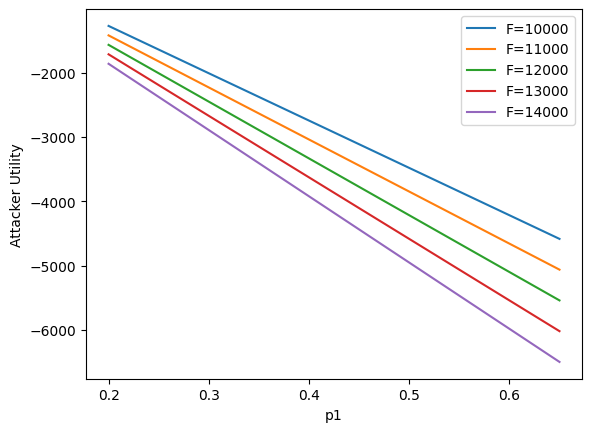

defaultdict(<class 'list'>, {10000: [0.2, 0.25, 0.3, 0.35, 0.39999999999999997, 0.44999999999999996, 0.49999999999999994, 0.5499999999999999, 0.5999999999999999, 0.6499999999999999], 11000: [0.2, 0.25, 0.3, 0.35, 0.39999999999999997, 0.44999999999999996, 0.49999999999999994, 0.5499999999999999, 0.5999999999999999, 0.6499999999999999], 12000: [0.2, 0.25, 0.3, 0.35, 0.39999999999999997, 0.44999999999999996, 0.49999999999999994, 0.5499999999999999, 0.5999999999999999, 0.6499999999999999], 13000: [0.2, 0.25, 0.3, 0.35, 0.39999999999999997, 0.44999999999999996, 0.49999999999999994, 0.5499999999999999, 0.5999999999999999, 0.6499999999999999], 14000: [0.2, 0.25, 0.3, 0.35, 0.39999999999999997, 0.44999999999999996, 0.49999999999999994, 0.5499999999999999, 0.5999999999999999, 0.6499999999999999]})
defaultdict(<class 'list'>, {10000: [-1271.4585036092542, -1639.6599345513907, -2007.8613654935275, -2376.062796435664, -2744.2642273778006, -3112.465658319937, -3480.6670892620727, -3848.868520204209

In [48]:
from collections import defaultdict
import matplotlib.pyplot as plt

Fi = defaultdict(list)
Ei = defaultdict(list)

# Define realistic ranges for the variables
F_range = range(10000, 15000, 1000)  # Updated range for B
p1_range = np.arange(0.2,0.7,0.05)  # Updated range for C_ht


for F in F_range:
    for p1 in p1_range:
        p = sample.clone()
        p.F=F
        p.p_1=p1

        e_a_b_1 = t_u_3_1(p)

        Fi[F].append(p1)
        Ei[F].append(e_a_b_1)

# Generate multiple lines on the same plot
for F in F_range:
    plt.plot(Fi[F], Ei[F], label=f'F={F}')

# Adding title and labels
plt.xlabel("p1")
plt.ylabel("Attacker Utility")

# Adding a legend
plt.legend()

plt.savefig("n1-3.pdf", format="pdf", bbox_inches="tight")


# Displaying the plot
plt.show()
print(Fi)
print(Ei)


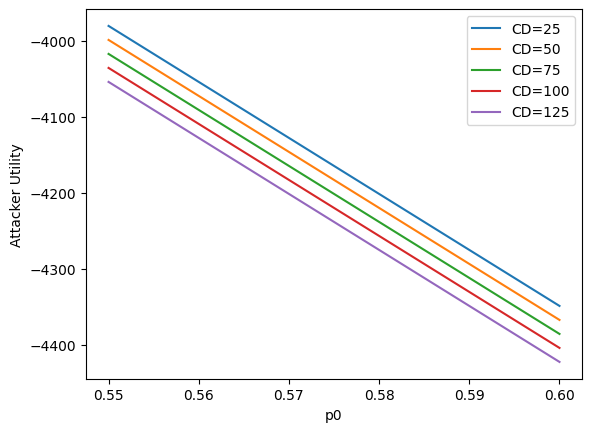

defaultdict(<class 'list'>, {25: [0.55, 0.5553431489059035, 0.5607382055213174, 0.5661856741200982, 0.5716860638750311, 0.5772398889054204, 0.5828476683251457, 0.5885099262911818, 0.5942271920525929, 0.6], 50: [0.55, 0.5553431489059035, 0.5607382055213174, 0.5661856741200982, 0.5716860638750311, 0.5772398889054204, 0.5828476683251457, 0.5885099262911818, 0.5942271920525929, 0.6], 75: [0.55, 0.5553431489059035, 0.5607382055213174, 0.5661856741200982, 0.5716860638750311, 0.5772398889054204, 0.5828476683251457, 0.5885099262911818, 0.5942271920525929, 0.6], 100: [0.55, 0.5553431489059035, 0.5607382055213174, 0.5661856741200982, 0.5716860638750311, 0.5772398889054204, 0.5828476683251457, 0.5885099262911818, 0.5942271920525929, 0.6], 125: [0.55, 0.5553431489059035, 0.5607382055213174, 0.5661856741200982, 0.5716860638750311, 0.5772398889054204, 0.5828476683251457, 0.5885099262911818, 0.5942271920525929, 0.6]})
defaultdict(<class 'list'>, {25: [-3980.257468484497, -4019.604569942308, -4059.333

In [49]:
from collections import defaultdict
import matplotlib.pyplot as plt

Fi = defaultdict(list)
Ei = defaultdict(list)

# Define realistic ranges for the variables
F_range = range(25, 150, 25)  # Updated range for B
p1_range = generate_log_range(0.55,0.6,10)  # Updated range for C_ht

for F in F_range:
    for p1 in p1_range:
        p = sample.clone()
        p.C_D=F
        p.p_0=p1
        e_a_b_1 = t_u_3_1(p)

        Fi[F].append(p1)
        Ei[F].append(e_a_b_1)

# Generate multiple lines on the same plot
for F in F_range:
    plt.plot(Fi[F], Ei[F], label=f'CD={F}')

# Adding title and labels
plt.xlabel("p0")
plt.ylabel("Attacker Utility")

# Adding a legend
plt.legend()

plt.savefig("n2-1.pdf", format="pdf", bbox_inches="tight")


# Displaying the plot
plt.show()
print(Fi)
print(Ei)


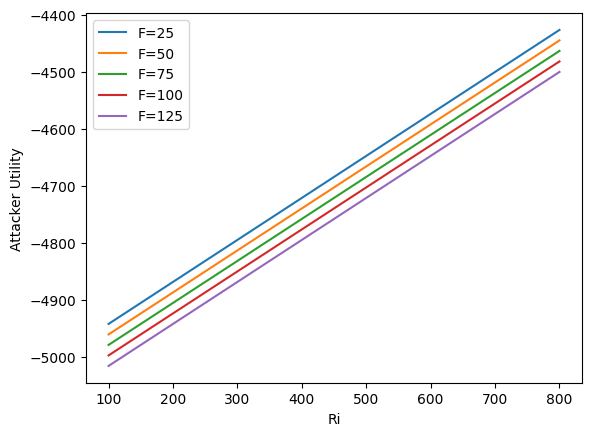

defaultdict(<class 'list'>, {25: [100, 200, 300, 400, 500, 600, 700, 800], 50: [100, 200, 300, 400, 500, 600, 700, 800], 75: [100, 200, 300, 400, 500, 600, 700, 800], 100: [100, 200, 300, 400, 500, 600, 700, 800], 125: [100, 200, 300, 400, 500, 600, 700, 800]})
defaultdict(<class 'list'>, {25: [-4942.426770102357, -4868.786483913929, -4795.146197725502, -4721.505911537074, -4647.865625348648, -4574.22533916022, -4500.585052971793, -4426.944766783365], 50: [-4960.836841649463, -4887.196555461036, -4813.556269272609, -4739.915983084182, -4666.275696895755, -4592.635410707327, -4518.9951245188995, -4445.354838330472], 75: [-4979.246913196571, -4905.606627008143, -4831.966340819715, -4758.326054631289, -4684.685768442861, -4611.045482254433, -4537.405196066006, -4463.764909877579], 100: [-4997.656984743677, -4924.01669855525, -4850.3764123668225, -4776.736126178395, -4703.095839989967, -4629.45555380154, -4555.815267613114, -4482.174981424686], 125: [-5016.0670562907835, -4942.426770102357

In [50]:
from collections import defaultdict
import matplotlib.pyplot as plt

Fi = defaultdict(list)
Ei = defaultdict(list)

# Define realistic ranges for the variables
F_range = range(25, 150, 25)  # Updated range for B
R_range = range(100,900,100)  # Updated range for C_ht

for F in F_range:
    for R in R_range:
        p = sample.clone()
        p.C_D=F
        p.R_i=R
        e_a_b_1 = t_u_3_1(p)

        Fi[F].append(R)
        Ei[F].append(e_a_b_1)

# Generate multiple lines on the same plot
for F in F_range:
    plt.plot(Fi[F], Ei[F], label=f'F={F}')

# Adding title and labels
plt.xlabel("Ri")
plt.ylabel("Attacker Utility")

# Adding a legend
plt.legend()

plt.savefig("n2-1.pdf", format="pdf", bbox_inches="tight")


# Displaying the plot
plt.show()
print(Fi)
print(Ei)


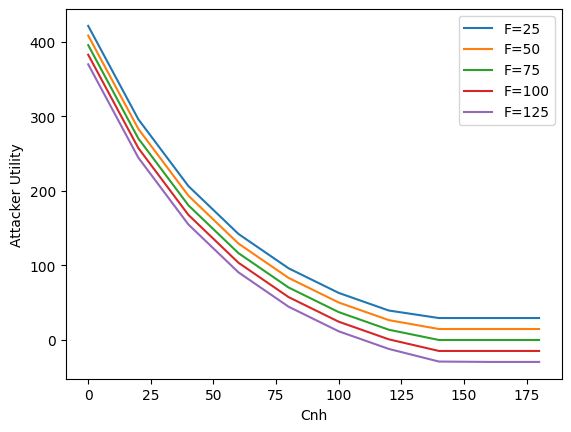

defaultdict(<class 'list'>, {25: [0, 20, 40, 60, 80, 100, 120, 140, 160, 180], 50: [0, 20, 40, 60, 80, 100, 120, 140, 160, 180], 75: [0, 20, 40, 60, 80, 100, 120, 140, 160, 180], 100: [0, 20, 40, 60, 80, 100, 120, 140, 160, 180], 125: [0, 20, 40, 60, 80, 100, 120, 140, 160, 180]})
defaultdict(<class 'list'>, {25: [421.5906384287464, 296.3423459399189, 206.5980227757701, 142.29340528240485, 96.21713343393762, 63.2020419800012, 39.54569523179867, 29.45611447537093, 29.45611447537093, 29.45611447537093], 50: [408.70358834577166, 283.4552958569442, 193.71097269279528, 129.40635519943004, 83.33008335096282, 50.31499189702642, 26.65864514882389, 14.728057237685462, 14.728057237685462, 14.728057237685462], 75: [395.8165382627969, 270.5682457739694, 180.82392260982053, 116.51930511645529, 70.44303326798806, 37.42794181405164, 13.771595065849109, -2.6162285205240937e-15, -2.6162285205240937e-15, -2.6162285205240937e-15], 100: [382.92948817982204, 257.6811956909946, 167.93687252684572, 103.63225

In [64]:
from collections import defaultdict
import matplotlib.pyplot as plt

Fi = defaultdict(list)
Ei = defaultdict(list)

# Define realistic ranges for the variables
F_range = range(25, 150, 25)  # Updated range for B
R_range = range(0,200,20)  # Updated range for C_ht

for F in F_range:
    for R in R_range:
        p = sample.clone()
        p.F=F
        p.C_nh=R
        p=p.clone()
        e_a_b_1 = t_u_3_1(p)

        Fi[F].append(R)
        Ei[F].append(e_a_b_1)

# Generate multiple lines on the same plot
for F in F_range:
    plt.plot(Fi[F], Ei[F], label=f'F={F}')

# Adding title and labels
plt.xlabel("Cnh")
plt.ylabel("Attacker Utility")

# Adding a legend
plt.legend()

plt.savefig("n2-1.pdf", format="pdf", bbox_inches="tight")


# Displaying the plot
plt.show()
print(Fi)
print(Ei)


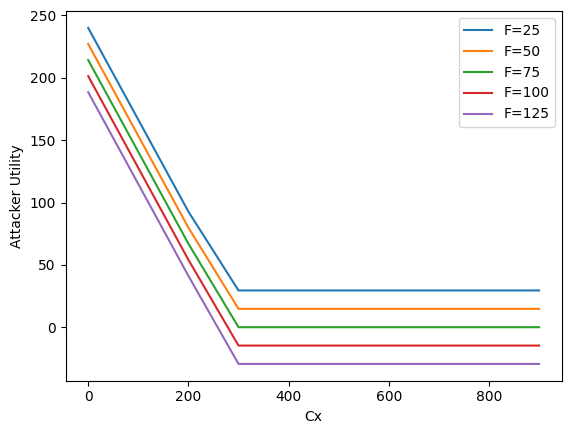

defaultdict(<class 'list'>, {25: [0, 100, 200, 300, 400, 500, 600, 700, 800, 900], 50: [0, 100, 200, 300, 400, 500, 600, 700, 800, 900], 75: [0, 100, 200, 300, 400, 500, 600, 700, 800, 900], 100: [0, 100, 200, 300, 400, 500, 600, 700, 800, 900], 125: [0, 100, 200, 300, 400, 500, 600, 700, 800, 900]})
defaultdict(<class 'list'>, {25: [240.00837040821665, 166.36808421978932, 92.72779803136198, 29.45611447537093, 29.45611447537093, 29.45611447537093, 29.45611447537093, 29.45611447537093, 29.45611447537093, 29.45611447537093], 50: [227.12132032524187, 153.48103413681454, 79.8407479483872, 14.728057237685462, 14.728057237685462, 14.728057237685462, 14.728057237685462, 14.728057237685462, 14.728057237685462, 14.728057237685462], 75: [214.2342702422671, 140.59398405383976, 66.95369786541244, -2.6162285205240937e-15, -2.6162285205240937e-15, -2.6162285205240937e-15, -2.6162285205240937e-15, -2.6162285205240937e-15, -2.6162285205240937e-15, -2.6162285205240937e-15], 100: [201.3472201592923, 127

In [78]:
from collections import defaultdict
import matplotlib.pyplot as plt

Fi = defaultdict(list)
Ei = defaultdict(list)

# Define realistic ranges for the variables
F_range = range(25, 150, 25)  # Updated range for B
R_range = range(0,1000,100)  # Updated range for C_ht

for F in F_range:
    for R in R_range:
        p = sample.clone()
        p.F=F
        p.C_x=R
        p=p.clone()
        e_a_b_1 = t_u_3_1(p)

        Fi[F].append(R)
        Ei[F].append(e_a_b_1)

# Generate multiple lines on the same plot
for F in F_range:
    plt.plot(Fi[F], Ei[F], label=f'F={F}')

# Adding title and labels
plt.xlabel("Cx")
plt.ylabel("Attacker Utility")

# Adding a legend
plt.legend()

plt.savefig("n2-1.pdf", format="pdf", bbox_inches="tight")


# Displaying the plot
plt.show()
print(Fi)
print(Ei)


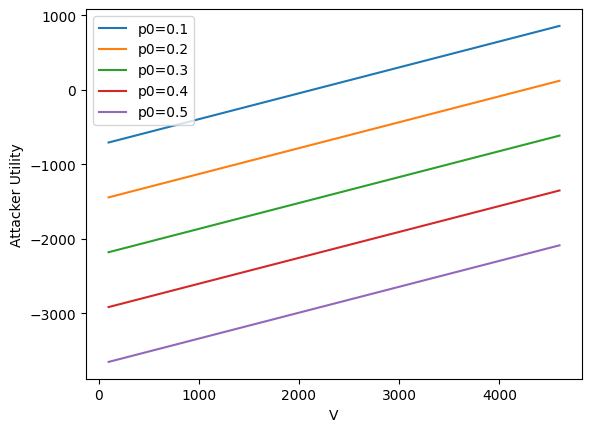

defaultdict(<class 'list'>, {0.1: [100, 600, 1100, 1600, 2100, 2600, 3100, 3600, 4100, 4600], 0.2: [100, 600, 1100, 1600, 2100, 2600, 3100, 3600, 4100, 4600], 0.3: [100, 600, 1100, 1600, 2100, 2600, 3100, 3600, 4100, 4600], 0.4: [100, 600, 1100, 1600, 2100, 2600, 3100, 3600, 4100, 4600], 0.5: [100, 600, 1100, 1600, 2100, 2600, 3100, 3600, 4100, 4600]})
defaultdict(<class 'list'>, {0.1: [-708.9816823734269, -535.055641724981, -361.1296010765351, -187.20356042808928, -13.277519779643438, 160.64852086880248, 334.5745615172483, 508.5006021656941, 682.42664281414, 856.3526834625857], 0.2: [-1445.3845442577, -1271.4585036092542, -1097.5324629608083, -923.6064223123626, -749.6803816639167, -575.7543410154707, -401.8283003670249, -227.902259718579, -53.976219070133176, 119.94982157831267], 0.3: [-2181.7874061419734, -2007.8613654935275, -1833.9353248450814, -1660.009284196636, -1486.0832435481898, -1312.157202899744, -1138.2311622512982, -964.3051216028523, -790.3790809544065, -616.45304030596

In [88]:
from collections import defaultdict
import matplotlib.pyplot as plt

Fi = defaultdict(list)
Ei = defaultdict(list)

# Define realistic ranges for the variables
V_range = range(100, 5000, 500)
p0_range = [0.1,0.2,0.3,0.4,0.5]

for p0 in p0_range:
    for V in V_range:
        p = sample.clone()
        p.V_i_prime=V
        p.p_1=p0
        p=p.clone()
        e_a_b_1 = t_u_3_1(p)

        Fi[p0].append(V)
        Ei[p0].append(e_a_b_1)

# Generate multiple lines on the same plot
for p0 in p0_range:
    plt.plot(Fi[p0], Ei[p0], label=f'p0={p0}')

# Adding title and labels
plt.xlabel("V_i_prime")
plt.ylabel("Attacker Utility")

# Adding a legend
plt.legend()

plt.savefig("n2-1.pdf", format="pdf", bbox_inches="tight")


# Displaying the plot
plt.show()
print(Fi)
print(Ei)


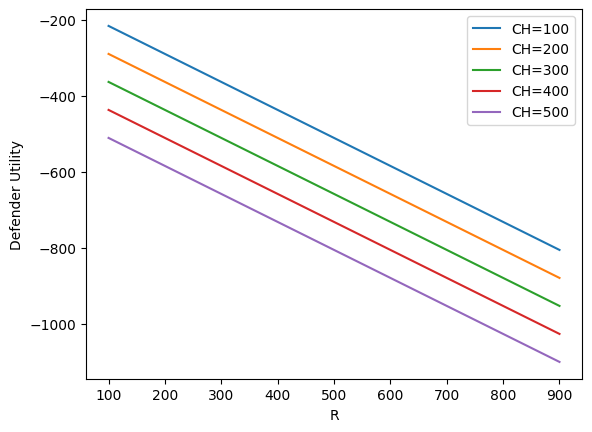

defaultdict(<class 'list'>, {100: [100, 200, 300, 400, 500, 600, 700, 800, 900], 200: [100, 200, 300, 400, 500, 600, 700, 800, 900], 300: [100, 200, 300, 400, 500, 600, 700, 800, 900], 400: [100, 200, 300, 400, 500, 600, 700, 800, 900], 500: [100, 200, 300, 400, 500, 600, 700, 800, 900]})
defaultdict(<class 'list'>, {100: [-216.85098863623296, -290.4912748246603, -364.13156101308766, -437.7718472015149, -511.41213338994226, -585.0524195783697, -658.6927057667971, -732.3329919552242, -805.9732781436516], 200: [-290.4912748246603, -364.13156101308766, -437.7718472015149, -511.41213338994226, -585.0524195783697, -658.6927057667971, -732.3329919552242, -805.9732781436516, -879.6135643320789], 300: [-364.13156101308766, -437.7718472015149, -511.41213338994226, -585.0524195783697, -658.6927057667971, -732.3329919552242, -805.9732781436516, -879.6135643320789, -953.2538505205061], 400: [-437.7718472015149, -511.41213338994226, -585.0524195783697, -658.6927057667971, -732.3329919552242, -805.9

In [74]:
from collections import defaultdict
import matplotlib.pyplot as plt

Fi = defaultdict(list)
Ei = defaultdict(list)


F_range = range(100,600,100)
R_range = range(100,1000, 100)

for F in F_range:
    for R in R_range:
        p = sample.clone()
        p.C_H=F
        p.R_i=R
        e_a_b_1 = u_3_1(p)
        Fi[F].append(R)
        Ei[F].append(e_a_b_1)

# Generate multiple lines on the same plot
for F in F_range:
    plt.plot(Fi[F], Ei[F], label=f'CH={F}')

# Adding title and labels
plt.xlabel("R")
plt.ylabel("Defender Utility")

# Adding a legend
plt.legend()

plt.savefig("n2-1.pdf", format="pdf", bbox_inches="tight")


# Displaying the plot
plt.show()
print(Fi)
print(Ei)


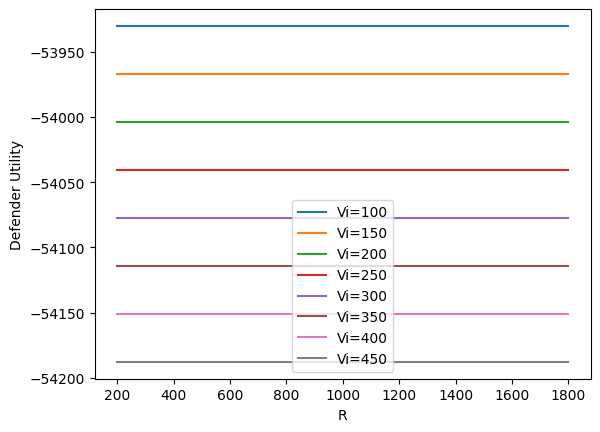

defaultdict(<class 'list'>, {100: [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800], 150: [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800], 200: [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800], 250: [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800], 300: [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800], 350: [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800], 400: [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800], 450: [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800]})
defaultdict(<class 'list'>, {100: [-53930.075734475126, -53930.075734475126, -53930.075734475126, -53930.075734475126, -53930.075734475126, -53930.075734475126, -53930.075734475126, -53930.075734475126, -53930.075734475126], 150: [-53966.89587756934, -53966.89587756934, -53966.89587756934, -53966.89587756934, -53966.89587756934, -53966.89587756934, -53966.89587756934, -53966.89587756934, -53966.89587756934], 200: [-54003.716020663545, -54003.716020663545, -54003.716020663545, -54003.716020663545, -54003.71602

In [54]:
from collections import defaultdict
import matplotlib.pyplot as plt

Fi = defaultdict(list)
Ei = defaultdict(list)

# Define realistic ranges for the variables
F_range = range(100,500,50)  # Updated range for B
R_range = range(200,2000, 200)  # Updated range for B

for F in F_range:
    for R in R_range:
        p = sample.clone()
        p.R_i=F
        p.V_i=R
        e_a_b_1 = u_3_1(p)
        Fi[F].append(R)
        Ei[F].append(e_a_b_1)

# Generate multiple lines on the same plot
for F in F_range:
    plt.plot(Fi[F], Ei[F], label=f'Vi={F}')

# Adding title and labels
plt.xlabel("R")
plt.ylabel("Defender Utility")

# Adding a legend
plt.legend()

plt.savefig("n2-1.pdf", format="pdf", bbox_inches="tight")


# Displaying the plot
plt.show()
print(Fi)
print(Ei)
